<a href="https://colab.research.google.com/github/yud0uhu/spotify-reccomend-bot/blob/main/global_top_chart200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install spotipy

import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

client_id = '*****'
client_secret = '*****'
client_credentials_manager = spotipy.oauth2.SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

     |████████████████████████████████| 62 kB 462 kB/s 
     |████████████████████████████████| 138 kB 18.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
from google.colab import files
uploaded = files.upload()

songs = pd.read_csv("regional-global-weekly-latest.csv", index_col=0, header=1)
songs.head(200)

songs=songs.reset_index()
songs.head(200)

Saving regional-global-weekly-latest.csv to regional-global-weekly-latest (2).csv


,Position,Track Name,Artist,Streams,URL
0,1,Beggin',Måneskin,51365875,https://open.spotify.com/track/3Wrjm47oTz2sjIg...
1,2,Stay (with Justin Bieber),The Kid LAROI,44889152,https://open.spotify.com/track/5HCyWlXZPP0y6Gq...
2,3,good 4 u,Olivia Rodrigo,44027552,https://open.spotify.com/track/4ZtFanR9U6ndgdd...
3,4,Bad Habits,Ed Sheeran,38983802,https://open.spotify.com/track/6PQ88X9TkUIAUIZ...
4,5,Kiss Me More (feat. SZA),Doja Cat,30080808,https://open.spotify.com/track/3DarAbFujv6eYNl...
...,...,...,...,...,...
195,196,Bipolar,Mc Davi,5116589,https://open.spotify.com/track/0qxLQ6opocOGyFn...
196,197,"His & Hers (feat. Don Toliver, Lil Uzi Vert & ...",Internet Money,5110475,https://open.spotify.com/track/2IePEfMAtqWS6rL...
197,198,Follow You,Imagine Dragons,5097187,https://open.spotify.com/track/7FdUvDkaE24o3FP...
198,199,7 rings,Ariana Grande,5061584,https://open.spotify.com/track/6ocbgoVGwYJhOv1...


In [8]:
song_info = pd.DataFrame()

for url in songs["URL"] : 
   df = pd.DataFrame.from_dict(spotify.audio_features(url))
   song_info = song_info.append(df)
song_info.head(200)

song_info=song_info.reset_index(drop=True)
song_info.head(200)

song_info.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,0.681585,0.640135,5.360000,-6.074790,0.585000,0.102846,0.261394,0.009795,0.176632,0.537701,120.893195,198356.545000,3.96500
std,0.146578,0.163258,3.533103,2.194915,0.493958,0.095256,0.248639,0.064003,0.137792,0.230974,27.481406,44846.283577,0.20975
min,0.345000,0.203000,0.000000,-12.627000,0.000000,0.023200,0.000025,0.000000,0.046100,0.065000,71.105000,58149.000000,3.00000
25%,0.590250,0.526750,2.000000,-7.367250,0.000000,0.042475,0.050925,0.000000,0.094150,0.347750,98.921000,169237.750000,4.00000
50%,0.702000,0.661000,6.000000,-5.714500,1.000000,0.062400,0.185000,0.000000,0.121000,0.543000,120.096500,194437.500000,4.00000
75%,0.789000,0.765250,8.000000,-4.521750,1.000000,0.119500,0.407750,0.000024,0.213500,0.720250,135.942250,218459.000000,4.00000
max,0.950000,0.960000,11.000000,-0.515000,1.000000,0.465000,0.941000,0.633000,0.920000,0.964000,187.815000,393280.000000,5.00000


No handles with labels found to put in legend.


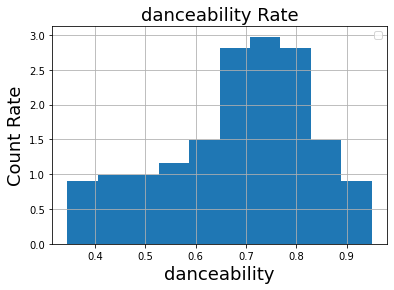

No handles with labels found to put in legend.


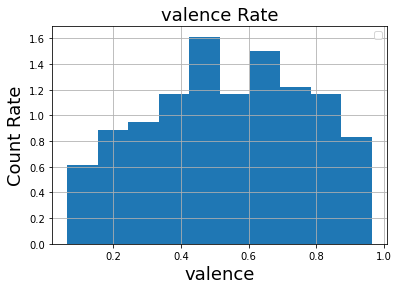

No handles with labels found to put in legend.


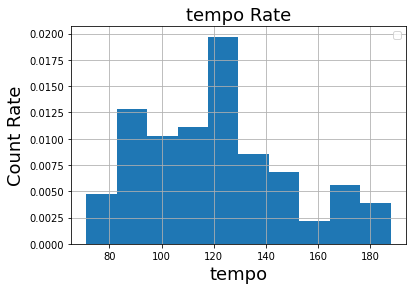

No handles with labels found to put in legend.


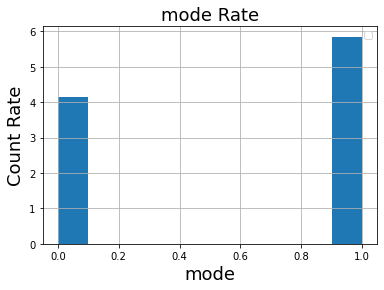

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid()
ax.hist(song_info['danceability'],
        bins=10, density=True)
plt.xlabel('danceability', fontsize=18)
plt.ylabel('Count Rate', fontsize=18)
plt.title('danceability' + ' Rate', fontsize=18)
ax.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid()
ax.hist(song_info['valence'],
        bins=10, density=True)
plt.xlabel('valence', fontsize=18)
plt.ylabel('Count Rate', fontsize=18)
plt.title('valence' + ' Rate', fontsize=18)
ax.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid()
ax.hist(song_info['tempo'],
        bins=10, density=True)
plt.xlabel('tempo', fontsize=18)
plt.ylabel('Count Rate', fontsize=18)
plt.title('tempo' + ' Rate', fontsize=18)
ax.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid()
ax.hist(song_info['mode'],
        bins=10, density=True)
plt.xlabel('mode', fontsize=18)
plt.ylabel('Count Rate', fontsize=18)
plt.title('mode' + ' Rate', fontsize=18)
ax.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


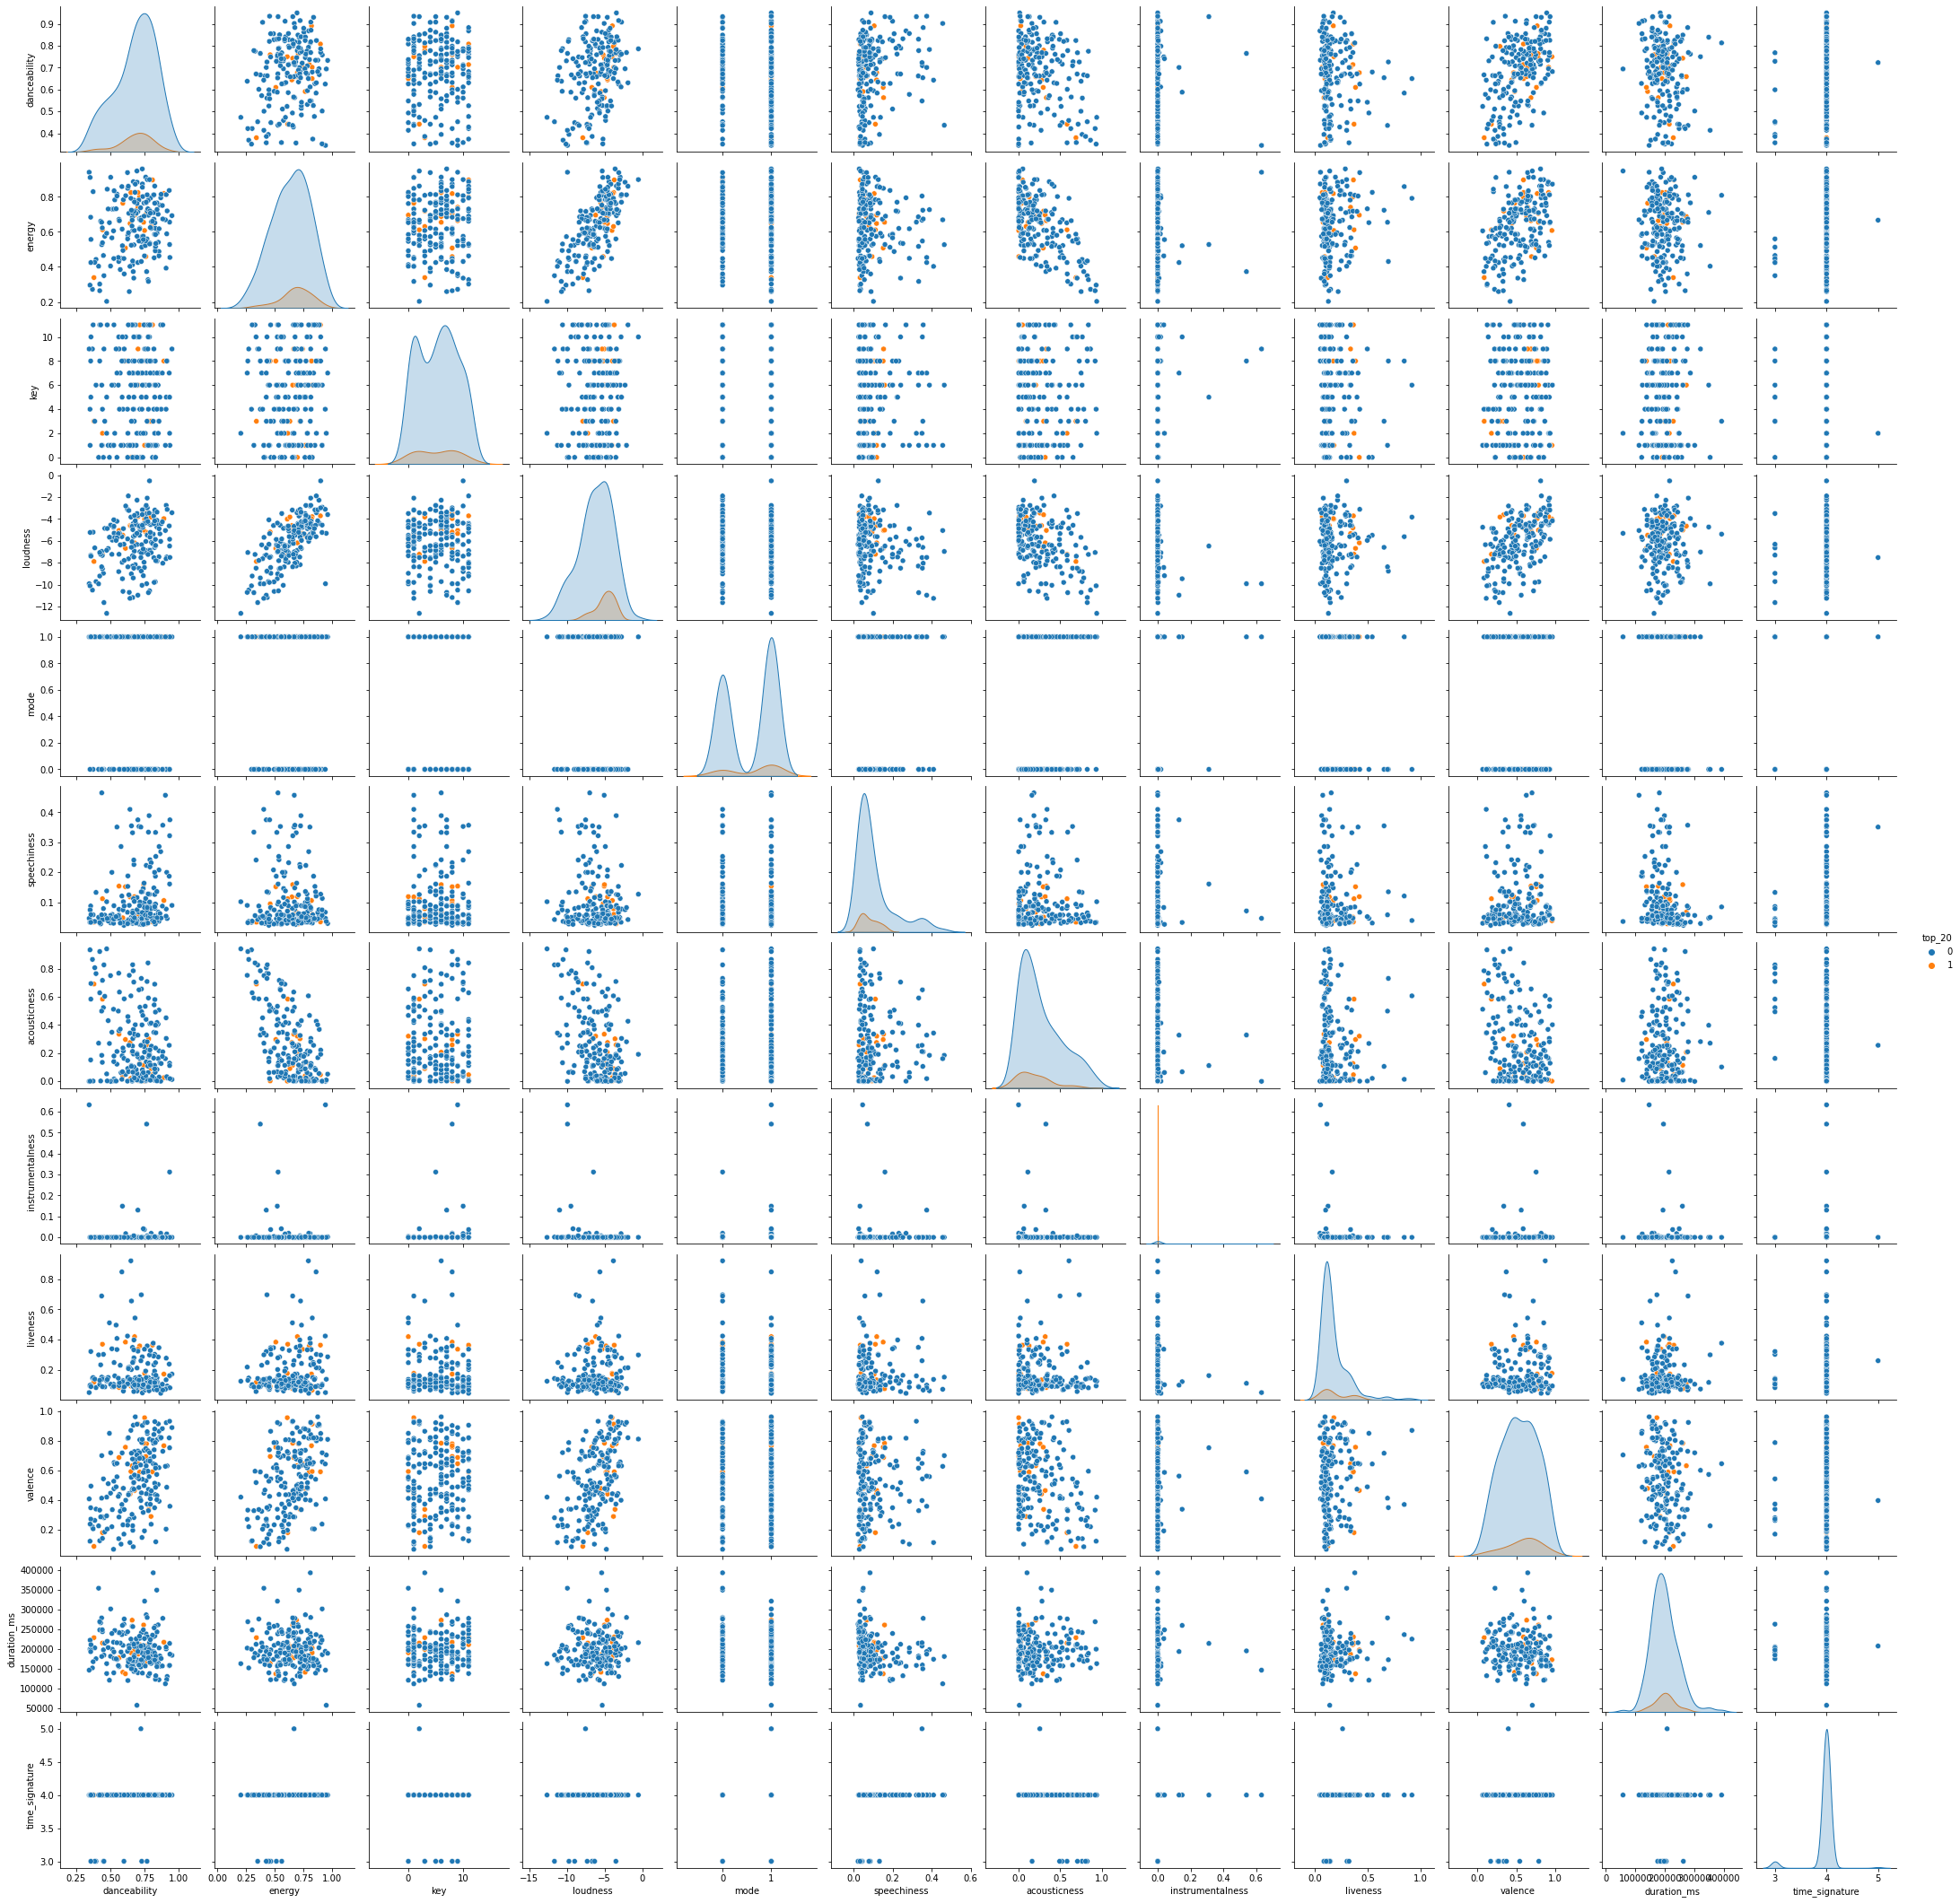

In [10]:
song_info["rank"] = song_info.index + 1
song_info["top_20"]=(song_info["rank"] <= 20).astype(int)

tempo_range = [0.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220.0, 240.0]
song_info["tempo_bin"] = pd.cut(song_info["tempo"], tempo_range, labels = tempo_range[0:-1])

song_info.sample(10)

import seaborn as sns
import matplotlib.pyplot as plt

pp = sns.pairplot(song_info.drop(columns=["tempo","rank"]), hue="top_20")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8755da510>,
      dtype=object)

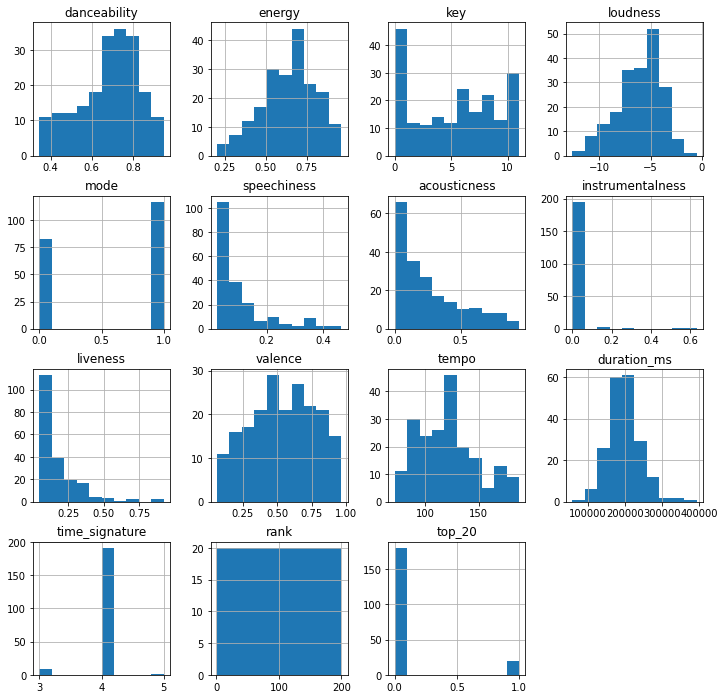

In [14]:
song_info.hist(figsize=(12,12))

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


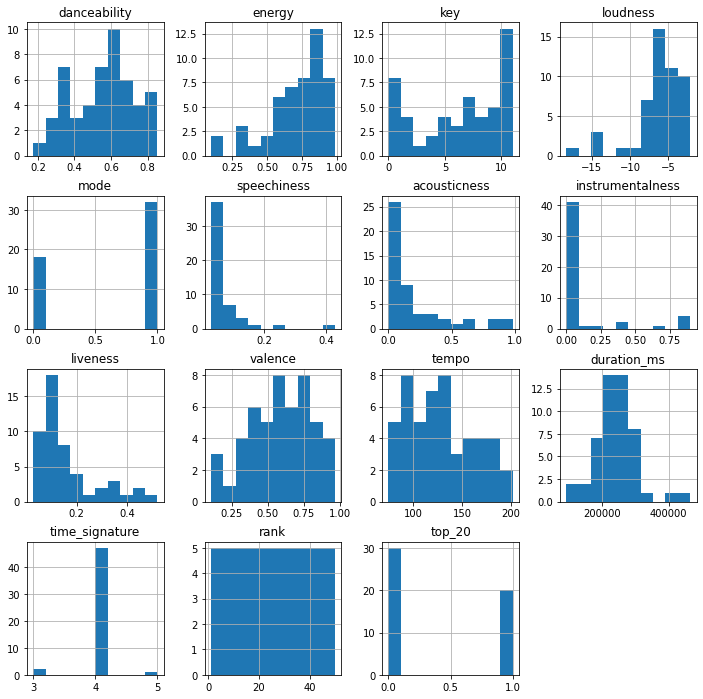

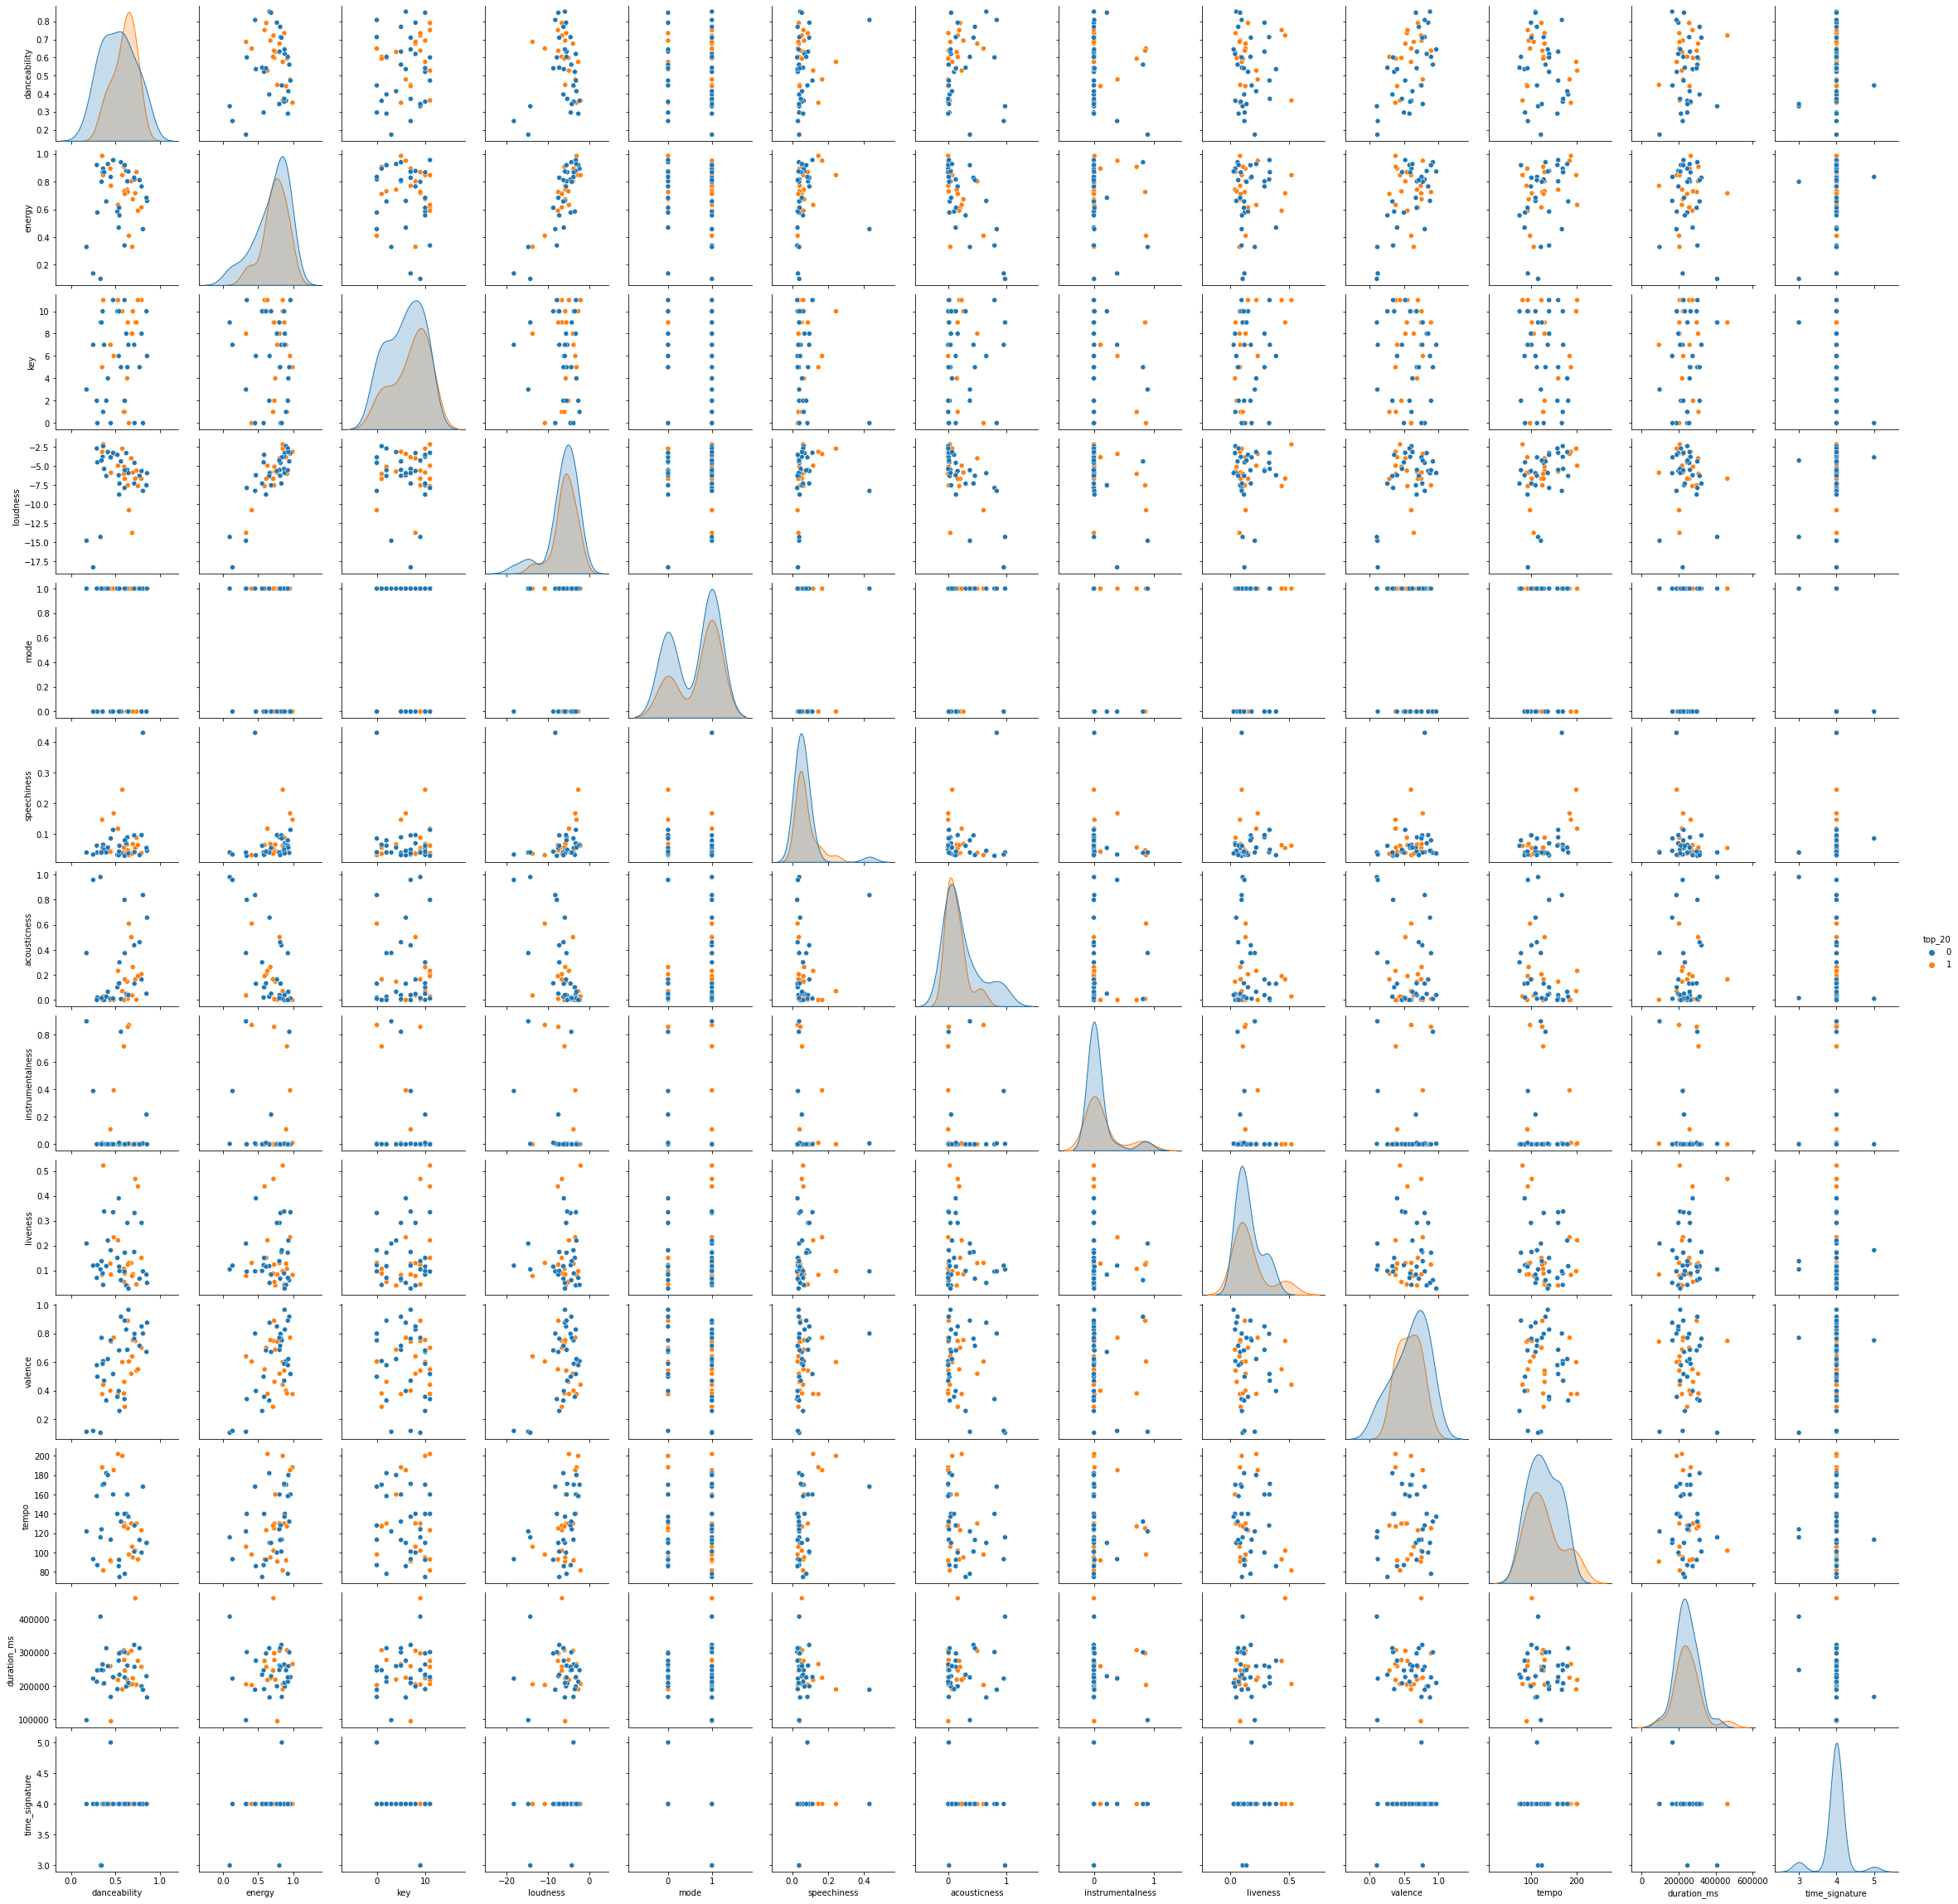

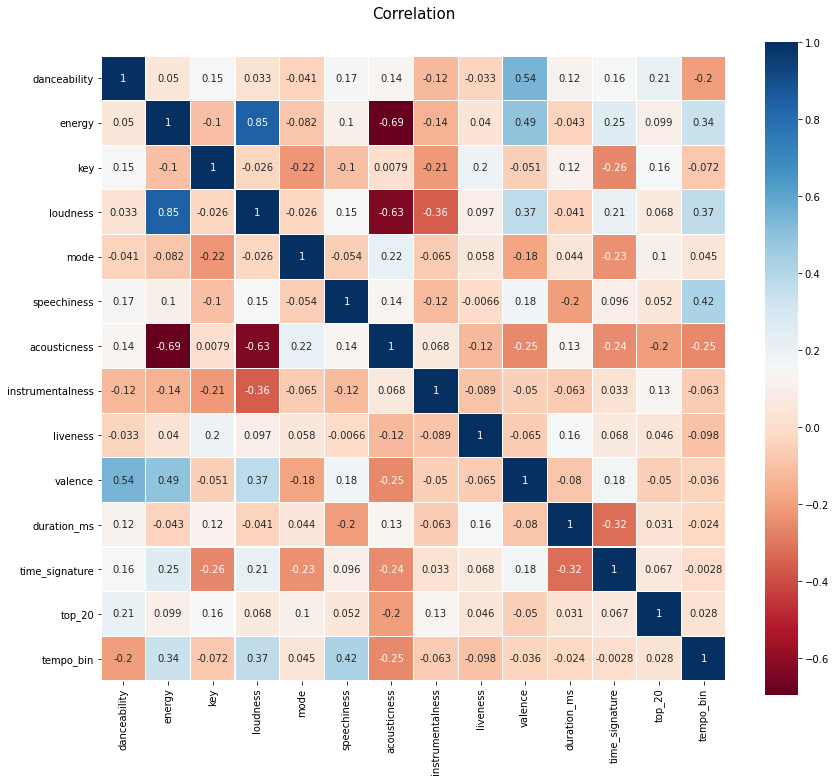

In [16]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
user_id = '*****'

playlist_features = []
danceabilitys = []
# プレイリストの特徴量を検出
result = sp.user_playlist(user_id, '*****')

playlist_features = []
danceabilitys = []
# プレイリストの特徴量を検出
result = sp.user_playlist(user_id, '*****')

playlist_info = pd.DataFrame()
for track in result['tracks']['items']:
  playlist_id = track['track']['id']
  df = pd.DataFrame.from_dict(sp.audio_features(playlist_id))
  playlist_info = playlist_info.append(df)

playlist_info=playlist_info.reset_index(drop=True)

playlist_info = playlist_info.drop(columns=["analysis_url","id","track_href","type","uri"])

playlist_info["rank"] = playlist_info.index + 1
playlist_info["top_20"]=(playlist_info["rank"] <= 20).astype(int)
tempo_range = [0.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220.0, 240.0]
playlist_info["tempo_bin"]=pd.cut(playlist_info["tempo"],tempo_range,labels=tempo_range[0:-1])

playlist_info.head(10)
playlist_info.describe()
playlist_info.hist(figsize=(12,12))

pp = sns.pairplot(playlist_info.drop(columns=["tempo_bin","rank"]), hue="top_20")

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation', y=1.05, size=15)

sns.heatmap(playlist_info.drop(columns=["rank", "tempo"]).astype(float).corr(), linewidths=0.1,cmap=colormap, vmax=1.0, square=True, annot=True)